In [260]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #,StandardScaler
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import warnings
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utilities")

# from features_creation import features_creation

pd.options.display.max_rows = None
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [261]:
data = pd.read_csv('../data/crawling_preprocess_data.csv',sep = ',')

In [262]:
pd.options.display.max_columns = None
data.head(5)

,Tournament,Phase,Home Team,Away Team,Match Date,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Three Pointers Made,Team Three Pointers Attempted,Team Free Throws Made,Team Free Throws Attempted,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Blocks,Team Turnovers,Team Personal Fouls,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Blocks,Opponent Turnovers,Opponent Personal Fouls,Team,Opponent Team,Team Result,Winner Team,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptFGM,opptPoss,teamDrtg,teamEDiff,team_Game_Score,Team Performance Index,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,oppt_Game_Score,Opponent Performance Index,Points difference,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
0,Liga ACB,Regular Season,FC BARCELONA BÀSQUET,SASKI BASKONIA,2014-10-04,87.0,34.0,54.0,10.0,13.0,9.0,12.0,5.0,29.0,34.0,15.0,10.0,2.0,22.0,17.0,65.0,28.0,66.0,1.0,10.0,8.0,12.0,9.0,16.0,25.0,14.0,16.0,2.0,14.0,19.0,FC BARCELONA BÀSQUET,SASKI BASKONIA,1,FC BARCELONA BÀSQUET,67.0,44.0,57.627119,34.090909,60.182623,73.134328,23.809524,76.315789,23.334748,87.940476,11.371328,2.274266,3.030303,1.298507,52.380952,15.194489,0.681818,0.454545,55.500,98.930554,76.0,29.0,82.889211,78.417926,20.512627,61.8,102.0,42.372881,48.275862,39.985236,38.815789,23.684211,76.190476,14.693535,19.302874,2.412859,3.703704,0.855263,33.000,78.417926,98.930554,-20.512627,35.802469,14.181524,1.000000,1.142857,38.5,64.0,22.0,0,0,0,0,1,0,0
1,Liga ACB,Regular Season,REAL BETIS BALONCESTO,CB 1939 CANARIAS,2014-10-04,87.0,33.0,66.0,8.0,18.0,13.0,19.0,8.0,23.0,31.0,13.0,8.0,1.0,13.0,27.0,96.0,35.0,63.0,8.0,20.0,18.0,30.0,10.0,25.0,35.0,24.0,8.0,1.0,12.0,19.0,REAL BETIS BALONCESTO,CB 1939 CANARIAS,0,CB 1939 CANARIAS,84.0,41.0,46.969697,31.707317,47.098311,53.571429,24.242424,69.696970,12.338648,93.446061,8.561089,1.070136,1.587302,1.035714,46.067416,12.790240,1.000000,0.615385,37.625,93.101838,83.0,43.0,94.030303,102.094747,-8.992909,48.7,80.0,53.030303,55.813953,49.896050,56.626506,30.303030,75.757576,11.090573,8.507896,1.063487,1.515152,1.156627,62.750,102.094747,93.101838,8.992909,50.588235,22.684310,2.000000,0.666667,70.7,129.0,-9.0,0,0,0,0,1,0,0
2,Liga ACB,Regular Season,OBRADOIRO CAB,BÀSQUET MANRESA,2014-10-04,88.0,28.0,51.0,11.0,21.0,21.0,22.0,5.0,24.0,29.0,22.0,8.0,3.0,16.0,24.0,64.0,21.0,56.0,4.0,15.0,18.0,24.0,14.0,14.0,28.0,6.0,6.0,2.0,16.0,20.0,OBRADOIRO CAB,BÀSQUET MANRESA,1,OBRADOIRO CAB,72.0,39.0,50.877193,56.410256,53.868756,61.805556,26.315789,63.157895,16.380016,87.507895,9.142032,3.428262,5.357143,1.222222,46.987952,21.929825,1.375000,0.500000,53.750,100.562355,71.0,25.0,78.466316,81.563661,18.998694,63.4,105.0,49.122807,24.000000,39.234919,38.028169,36.842105,73.684211,16.400164,7.646593,2.548864,3.921569,0.901408,14.250,81.563661,100.562355,-18.998694,34.246575,7.278020,0.375000,0.375000,23.5,59.0,24.0,0,0,0,0,1,0,0
3,Liga ACB,Regular Season,BILBAO BASKET,BALONCESTO FUENLABRADA,2014-10-05,73.0,24.0,59.0,7.0,25.0,18.0,23.0,10.0,23.0,33.0,15.0,9.0,2.0,10.0,23.0,54.0,18.0,60.0,2.0,22.0,16.0,23.0,14.0,21.0,35.0,8.0,5.0,0.0,13.0,22.0,BILBAO BASKET,BALONCESTO FUENLABRADA,1,BILBAO BASKET,84.0,31.0,48.529412,48.387097,38.780280,41.071429,32.258065,62.162162,9.604303,84.906452,10.599901,2.355534,3.333333,0.869048,36.904762,15.169903,1.500000,0.900000,33.125,85.976977,82.0,20.0,79.098378,68.269415,17.707562,40.2,79.0,51.470588,40.000000,2

In [263]:
data['Match Date']=pd.to_datetime(data['Match Date'])

In [264]:
data.shape

(5035, 95)

# Greek Basket League

In [265]:
greece_features = pd.read_csv('Features_Per_Tournament/greece_features.csv',sep = ',')

x_greece = greece_features.iloc[:,:-1]
y_greece = greece_features.iloc[:,-1]

x1_greece = data[(data['Tournament'] =="Basket League")&(data['Match Date'] >"2015-8-01")]

In [266]:
x_greece.shape

(818, 110)

In [267]:
x_greece.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Regular Season
0,1.0,1.0,7.0,22.0,20.691625,36.272927,1.0,7.0,20.691625,2.697837,19617.604936,0.021522,0.132626,3.864286,-2.691521,12.113692,1.104125,13.406937,15.742308,11.902729,-1.217963,10.895729,4.863882,4.725092,5.026149,3.615474,0.272487,-1.773251,-1.419051,2.561980,-1.068985,-0.927238,-2.149415,-1.202029,-2.283690,0.755220,0.831502,1.362363,-0.325644,0.860806,-0.719548,-0.583000,1.310432,4.275830,2.699273,1.084520,1.057300,2.731742,2.239463,10.214222,-66.285264,0.046398,0.4,13.300000,-4.303036,19.626030,-0.463336,15.775000,22.200,16.1600,-7.216473,12.409558,8.330930,8.100000,7.936675,9.930607,3.530514,0.969907,2.208850,4.572344,-0.899955,-1.075087,-1.431267,-0.369238,-2.948286,-9.812500,-13.800,-9.660,-4.262440,-5.200000,-3.637079,-5.090056,3.761373,2.476803,4.558903,2.833103,0.311053,4.263591,3.752194,4.386473,15.498649,4.232510,16.781320,5.540459,7.637681,6.305797,-4.232510,1.500151,0.989235,0.721508,0.594618,1.453589,0.378547,0.894967,-0.648454,0.717389,-0.371731,-0.773385,0.632850,1
1,1.0,0.0,22.0,13.0,26.081218,9.442758,1.0,22.0,26.081218,2.594468,4503.073132,-0.006929,0.085165,2.337912,-2.692297,0.743345,-2.352542,-2.390453,-3.483516,-4.095879,-2.637556,-1.894211,-2.480582,-5.909341,-1.191807,-2.921867,-5.555462,-5.272644,-4.819458,-2.323571,-2.068638,-1.186722,-1.369147,-0.814667,-0.485738,-6.621909,-11.156593,-8.248626,-1.114009,-8.247253,-0.794556,-2.339786,-5.257465,-8.088316,-6.256904,-0.953947,-4.687549,-2.352116,-2.561866,9.799667,4248.942175,0.051849,0.3,2.800000,4.493276,-1.451209,4.846608,-7.975000,-9.300,-10.2900,-3.801941,-

In [268]:
corr_df = greece_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
# corr_df

## Classifiers

In [269]:
x_greece_scaled = MinMaxScaler().fit_transform(x_greece)
#x_greece_scaled = StandardScaler().fit_transform(x_greece)

In [270]:
x_train_greece=x_greece_scaled[:len(x1_greece[x1_greece["Match Date"]<"2018-8-1"])]
y_train_greece=y_greece.iloc[:len(x1_greece[x1_greece["Match Date"]<"2018-8-1"])]
x_test_greece=x_greece_scaled[len(x1_greece[x1_greece["Match Date"]<"2018-8-1"]):]
y_test_greece=y_greece.iloc[len(x1_greece[x1_greece["Match Date"]<"2018-8-1"]):]

## Logistic Regression

In [271]:
lgr = LogisticRegression(solver='liblinear',C=0.6938346614477142, penalty =  'l2').fit(x_train_greece, y_train_greece)
y_pre_proba_lgr=lgr.predict_proba(x_test_greece)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(pd.Series(y_pre_proba_lgr[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_greece),3))


Logistic Regression

Test BS: 0.169

Test Accuracy: 0.767

Test F1-score: 0.829


In [272]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_greece.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef1,'greek_league')
# sorted_coef1

## Random Forest Classifier

In [273]:
rfc = RandomForestClassifier(max_depth= 13,max_features= 'sqrt',  min_samples_leaf= 0.040856687662947255,
                             min_samples_split= 0.1208432060337375,n_estimators= 79, 
                            random_state =2).fit(x_train_greece, y_train_greece)

y_pre_proba_rfc=rfc.predict_proba(x_test_greece)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(pd.Series(y_pre_proba_rfc[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_greece),3))

Random Forest Classifier

Test BS: 0.16

Test Accuracy: 0.743

Test F1-score: 0.814


In [274]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_greece.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef2,'greek_league')
# sorted_coef2

## xgboost

In [275]:
alg = XGBClassifier(booster='gbtree', objective='binary:logistic', colsample_bytree=0.622779742930514,
                    gamma=9.956582635690857,learning_rate=0.1345234453980909,max_depth=4,
                    n_estimators=81,reg_lambda= 0.9892757700055931,subsample=0.8024427587538274, 
                    verbosity=1).fit(x_train_greece, y_train_greece)

y_pre_proba_alg=alg.predict_proba(x_test_greece)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(pd.Series(y_pre_proba_alg[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_greece),3))


xgboost

Test BS: 0.166

Test Accuracy: 0.743

Test F1-score: 0.809


In [276]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_greece.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef3,'greek_league')
# sorted_coef3

# Ensemble

In [277]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,ens_proba),3))
print()
y_pre_ens=np.where(pd.Series(ens_proba)>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_ens,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_ens,y_test_greece),3))


------Ensemble 3 classifier-------

Test BS: 0.162

Test Accuracy: 0.738

Test F1-score: 0.809


In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import StackingClassifier


def gp_model(x_train,y_train,x_test,y_test, lgr, rfc, alg, ens_proba):
    y_pre_proba_lgr_train=lgr.predict_proba(x_train)[:,1]
    y_pre_proba_rfc_train=rfc.predict_proba(x_train)[:,1]
    y_pre_proba_alg_train=alg.predict_proba(x_train)[:,1]
    ens_proba_train=(y_pre_proba_lgr_train+y_pre_proba_rfc_train+y_pre_proba_alg_train)/3

    kernel = C(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel)

    param_grid = {
    'kernel__k1__constant_value': [0.1, 1.0, 10.0],
    'kernel__k2__length_scale': [0.1, 1.0, 10.0]
    }   

    search = GridSearchCV(gp, param_grid, cv=5)
    search.fit(x_train, y_train - ens_proba_train)

    print("Best parameters:", search.best_params_)

    delta_x = search.predict(x_test)
    
    calibrated_proba = ens_proba + delta_x

    print("Test BS:",round(brier_score_loss(y_test,calibrated_proba),3))
    print()
    y_pre_ens = np.where(calibrated_proba > 0.5, 1, 0)
    print("Test Accuracy:",round(accuracy_score(y_pre_ens,y_test),3))
    print()
    print("Test F1-score:",round(f1_score(y_pre_ens,y_test),3))

    # now do stacking
    estimators = [
        ('lgr', lgr),
        ('rfc', rfc),
        ('alg', alg)
    ]

    stacking_classifier = StackingClassifier(
        estimators=estimators
    )

    stacking_classifier.fit(x_train, y_train)

    y_pre_proba_stacking = stacking_classifier.predict_proba(x_test)[:,1]

    print("Stacking BS:",round(brier_score_loss(y_test,y_pre_proba_stacking),3))
    print()
    y_pre_stacking = np.where(y_pre_proba_stacking > 0.5, 1, 0)
    print("Stacking Accuracy:",round(accuracy_score(y_pre_stacking,y_test),3))
    print()
    print("Stacking F1-score:",round(f1_score(y_pre_stacking,y_test),3))



    

In [279]:
gp_model(x_train_greece, y_train_greece, x_test_greece, y_test_greece, lgr, rfc, alg, ens_proba)

Best parameters: {'kernel__k1__constant_value': 0.1, 'kernel__k2__length_scale': 10.0}
Test BS: 0.162

Test Accuracy: 0.738

Test F1-score: 0.809
Stacking BS: 0.166

Stacking Accuracy: 0.743

Stacking F1-score: 0.812


In [280]:
pd.options.display.max_rows = None
see_final_g=x1_greece[["Home Team","Away Team","Team Result"]][x1_greece["Match Date"]>"2018-8-1"]
see_final_g["prediction probability"]=ens_proba
see_final_g["RPS"]=(see_final_g["Team Result"]-see_final_g["prediction probability"])**2
see_final_g[see_final_g["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4106,G.S. LAVRIO B.C.,ARIS B.C.,0,0.723514,0.523472
4131,PROMITHEAS PATRAS B.C.,PERISTERI B.C.,0,0.785318,0.616725
4311,G.S. LAVRIO B.C.,KOLOSSOS RODOU B.C.,0,0.845455,0.714795
4313,GYMNASTIKOS S. LARISSAS 1928 B.C.,P.A.O.K. BC,1,0.163439,0.699834
4398,KYMIS B.C.,HOLARGOS B.C.,0,0.722559,0.522092
4496,RETHYMNO CRETAN KINGS B.C.,GYMNASTIKOS S. LARISSAS 1928 B.C.,0,0.718597,0.516381
4626,G.S. LAVRIO B.C.,RETHYMNO CRETAN KINGS B.C.,0,0.746370,0.557068
4750,ARIS B.C.,KOLOSSOS RODOU B.C.,0,0.810743,0.657304
4776,RETHYMNO CRETAN KINGS B.C.,PANIONIOS F.C.,0,0.717940,0.515437
4783,P.A.O.K. BC,GYMNASTIKOS S. LARISSAS 1928 B.C.,0,0.891676,0.795086


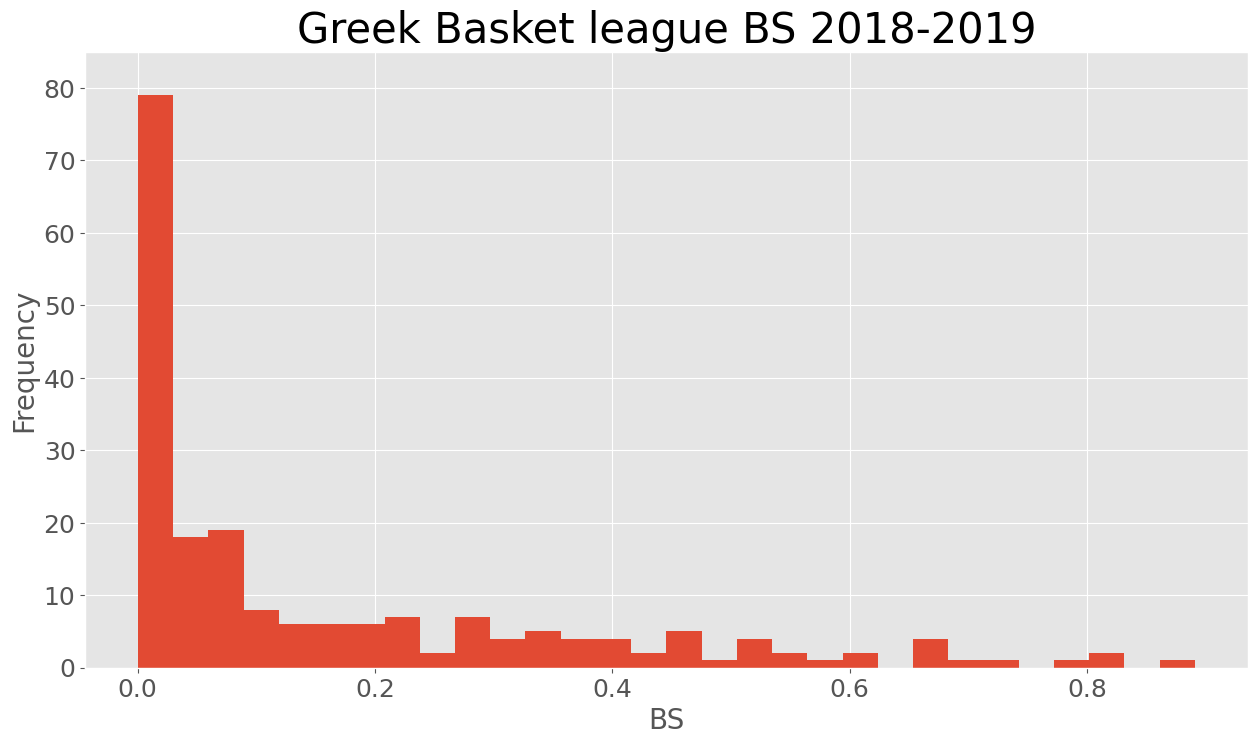

In [281]:
plt.figure(figsize=(15,8))

plt.hist(see_final_g["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Greek Basket league BS 2018-2019',fontsize=30)
plt.ylim(0,85)
plt.show()

In [282]:
see_final_g=x1_greece[["Home Team","Away Team","Team Result","Match Date"]][x1_greece["Match Date"]>"2018-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [283]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [284]:
res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Greek Basket league BS Months of 2018-2019',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()

NameError: name 'res' is not defined

# Liga ACB

In [285]:
spain_features = pd.read_csv('Features_Per_Tournament/spain_features.csv',sep = ',')

x_spain = spain_features.iloc[:,:-1]
y_spain = spain_features.iloc[:,-1]

x1_spain = data[(data['Tournament'] =="Liga ACB")&(data['Match Date'] >"2015-8-01")]

In [286]:
x_spain.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Regular Season
0,1.0,0.0,3.0,-3.0,-9.554547,-16.175530,1.0,3.0,-9.554547,1.504595,-79438.035358,0.026480,0.059740,-0.780229,-3.059152,-7.440144,-2.431129,-7.269761,-13.022059,-6.022896,4.127012,-3.313132,-1.210742,-0.252042,-2.460363,-1.417288,-2.210297,3.350308,-1.952750,-0.440936,0.656367,-1.695785,-0.916332,0.028515,-1.298020,4.673713,9.345180,3.344016,0.389548,0.528186,1.041430,-1.091956,-2.711338,-2.474414,-2.621137,-0.357457,-1.379659,-0.022403,-1.184309,9.908201,37122.178944,0.011698,-0.1,-0.366667,-5.226286,-1.604217,-0.713700,-9.985417,-14.183333,-9.357500,0.670276,-0.933941,-2.413324,-3.425000,-2.333435,-3.929890,-6.129348,7.245909,-5.856834,-1.140389,-0.294139,-4.727828,-1.409088,-0.044051,-4.486669,-1.489583,6.566667,-1.360000,-1.194160,-3.058333,1.894915,-1.461022,1.059840,5.216256,0.262357,-0.018202,0.122059,2.603038,0.028624,5.322884,13.224816,6.747102,16.135947,9.930251,16.119122,9.911285,-6.747102,2.579834,2.080245,1.863013,0.022114,-0.665010,-0.094940,0.069323,0.022489,-0.265976,-0.091478,0.072051,0.667712,1
1,1.0,0.0,26.0,11.0,31.981365,12.964179,1.0,26.0,31.981365,-0.050557,-28130.087979,-0.076803,-0.090909,0.770221,-1.836370,1.100173,-3.595353,2.224035,4.529412,1.345221,0.842409,1.942582,-0.106723,2.573529,0.655646,-0.226659,0.448221,-2.982094,0.640611,0.681332,1.066876,1.399277,1.346786,-0.725979,0.157563,2.097197,1.731618,2.461029,0.919434,1.803309,-1.084581,-0.952749,-2.139111,4.484811,-0.685505,-0.973472,0.849819,-0.127761,-1.232102,9.029621,-13569.027116,0.010104,-0.3,-7.791667,2.806570,-7.399933,-0.394101,-7.984375,-4.3750

In [287]:
corr_df = spain_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
110,Team Result,1.000000
13,history_pointsdiff,0.423455
9,pi_ratings,0.416360
12,history_winner,0.408552
17,history_FIC,0.397191
19,history_Game_Score,0.395582
53,Current_form_pointsdiff,0.382510
3,tradition_pointsdiff_general,0.380503
15,history_Ediff,0.369126
18,history_Performance_Index,0.357154


## Classifiers

In [288]:
x_spain_scaled = MinMaxScaler().fit_transform(x_spain)

In [289]:
x_train_spain=x_spain_scaled[:len(x1_spain[x1_spain["Match Date"]<"2018-8-1"])]
y_train_spain=y_spain.iloc[:len(x1_spain[x1_spain["Match Date"]<"2018-8-1"])]
x_test_spain=x_spain_scaled[len(x1_spain[x1_spain["Match Date"]<"2018-8-1"]):]
y_test_spain=y_spain.iloc[len(x1_spain[x1_spain["Match Date"]<"2018-8-1"]):]

## Logistic Regression

In [290]:
lgr = LogisticRegression(solver='liblinear',C=1.1171121660141514, penalty = "l1").fit(x_train_spain, y_train_spain)
y_pre_proba_lgr=lgr.predict_proba(x_test_spain)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(pd.Series(y_pre_proba_lgr[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_spain),3))


Logistic Regression

Test BS: 0.214

Test Accuracy: 0.664

Test F1-score: 0.767


In [291]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_spain.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef1,'liga_acb')
sorted_coef1

,feature_name,value
0,tradition_pointsdiff_general,2.349155
1,pi_ratings,1.626375
2,Tournament_Play,-1.575926
3,history_FIC,1.495689
4,history_winner,1.234061
5,history_EFG_received_sd,-1.104238
6,Regular Season,-1.049786
7,Tournament_EDiff_sd,0.839669
8,history_Game_Score,0.696389
9,Current_form_pointsdiff,0.496671


## Random Forest Classifier

In [292]:
rfc = RandomForestClassifier(max_depth= 19, max_features='log2', min_samples_leaf=0.05051947157434511,
                             min_samples_split=0.009080645821703, n_estimators=6,random_state=2
                            ).fit(x_train_spain, y_train_spain)

y_pre_proba_rfc=rfc.predict_proba(x_test_spain)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(pd.Series(y_pre_proba_rfc[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_spain),3))

Random Forest Classifier

Test BS: 0.206

Test Accuracy: 0.698

Test F1-score: 0.775


In [293]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_spain.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef2,'liga_acb')
sorted_coef2

,feature_name,value
0,pi_ratings,0.126117
1,history_Game_Score,0.109145
2,history_FIC,0.101507
3,history_Play,0.088915
4,tradition_pointsdiff_match,0.083656
5,history_Points,0.057293
6,Current_form_Play,0.053081
7,tradition_pointsdiff_general,0.051382
8,Current_form_pointsdiff,0.039816
9,Current_form_Performance_Index,0.037606


## xgboost

In [294]:
alg = XGBClassifier( colsample_bytree = 0.07729623870011615, gamma=8.97884898043499, learning_rate= 0.06271738449490522, 
                    max_depth= 14, n_estimators= 86, reg_lambda= 0.9451160660551007,subsample= 0.3700523653489849
                    ,objective='binary:logistic').fit(x_train_spain, y_train_spain)

y_pre_proba_alg=alg.predict_proba(x_test_spain)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(pd.Series(y_pre_proba_alg[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_spain),3))


xgboost

Test BS: 0.204

Test Accuracy: 0.691

Test F1-score: 0.765


In [295]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_spain.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef3,'liga_acb')
sorted_coef3

,feature_name,value
0,Current_form_FIC,0.059108
1,history_pointsdiff,0.055381
2,history_Ediff,0.048185
3,history_FIC,0.045908
4,history_winner,0.045263
5,elo,0.045155
6,history_Game_Score,0.043929
7,Current_form_pointsdiff,0.041824
8,history_EFG,0.041503
9,Current_form_Game_Score_received,0.038401


# Ensemble

In [296]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,ens_proba),3))
print()
ens_pred=np.where(ens_proba > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(ens_pred ,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(ens_pred,y_test_spain),3))

------Ensemble 3 classifier-------

Test BS: 0.205

Test Accuracy: 0.701

Test F1-score: 0.782


In [297]:
gp_model(x_train_spain, y_train_spain, x_test_spain, y_test_spain, lgr, rfc, alg, ens_proba)

Best parameters: {'kernel__k1__constant_value': 0.1, 'kernel__k2__length_scale': 10.0}
Test BS: 0.205

Test Accuracy: 0.701

Test F1-score: 0.782
Stacking BS: 0.206

Stacking Accuracy: 0.694

Stacking F1-score: 0.779


In [298]:
pd.options.display.max_rows = None
see_final_l=x1_spain[["Home Team","Away Team","Team Result"]][x1_spain["Match Date"]>"2018-8-1"]
see_final_l["prediction probability"]=ens_proba
see_final_l["RPS"]=(see_final_l["Team Result"]-see_final_l["prediction probability"])**2
see_final_l[see_final_l["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4070,CB ESTUDIANTES,BÀSQUET MANRESA,0,0.865834,0.749669
4087,CB GRAN CANARIA,OBRADOIRO CAB,0,0.833092,0.694042
4096,CB MIRAFLORES,BASKET ZARAGOZA,0,0.808656,0.653924
4133,BC ANDORRA,BÀSQUET MANRESA,0,0.826274,0.682729
4177,CB 1939 CANARIAS,CB ESTUDIANTES,0,0.810615,0.657097
4213,UCAM MURCIA CB,BÀSQUET MANRESA,0,0.767517,0.589082
4244,CB 1939 CANARIAS,BASKET ZARAGOZA,0,0.833634,0.694946
4245,BALONCESTO FUENLABRADA,FC BARCELONA BÀSQUET,1,0.279662,0.518887
4250,CB ESTUDIANTES,CLUB JOVENTUT BADALONA,0,0.729818,0.532634
4251,REAL MADRID BALONCESTO,BC ANDORRA,0,0.883113,0.779888


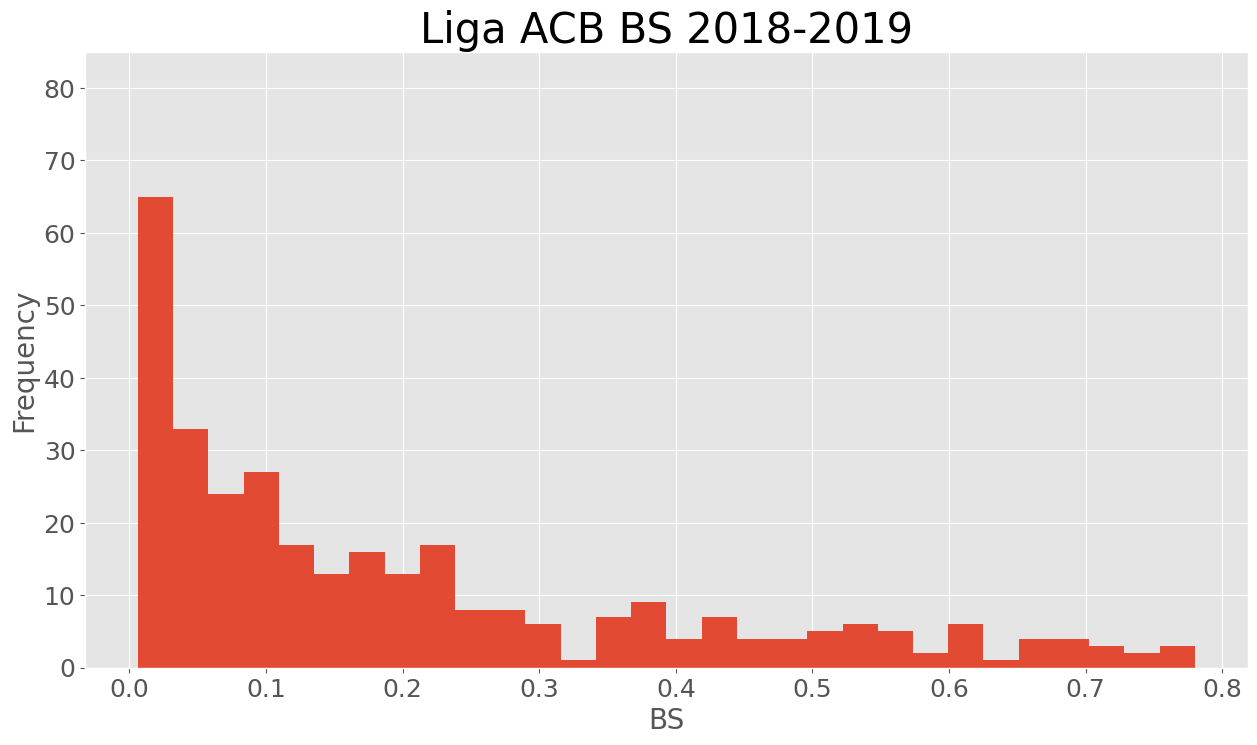

In [299]:
plt.figure(figsize=(15,8))

plt.hist(see_final_l["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Liga ACB BS 2018-2019',fontsize=30)
plt.ylim(0,85)
plt.show()

In [300]:
see_final_g=x1_spain[["Home Team","Away Team","Team Result","Match Date"]][x1_spain["Match Date"]>"2018-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [301]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Liga ACB BS Months of 2018-2019',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()

NameError: name 'res' is not defined

# Euroleague

In [316]:
euroleague_features = pd.read_csv('Features_Per_Tournament/euroleague_features.csv',sep = ',')

x_el = euroleague_features.iloc[:,:-1]
y_el = euroleague_features.iloc[:,-1]

x1_el = data[(data['Tournament'] =="Euroleague")&(data['Match Date'] >"2015-8-01")]

In [317]:
x_el.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Playoffs,Regular Season,Top 16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.358793,-10820.016379,-0.091342,-0.750000,-7.428571,-11.863854,0.000000,-14.131156,-44.175893,-90.492857,-51.071429,-85.689643,-92.319619,-42.988838,-81.707143,-44.008566,-48.966746,-14.332980,-20.040076,-14.448417,-9.889882,-9.536055,-5.690844,-9.512604,-4.967859,-7.360793,-32.399107,-68.564286,-39.207143,-40.577464,-74.278571,-41.904393,-46.303940,-10.595374,-15.006837,-11.516253,-5.341982,-8.483439,-4.710888,-6.462390,0.000000,0.000000,0.000000,-0.7,-6.333333,-10.559560,0.000000,-13.066978,-40.027083,-84.433333,-46.287500,-83.831892,-91.926827,-42.195136,-77.850,-42.477033,-47.164101,-13.176657,-11.834452,-13.090173,-9.894902,-9.298898,-6.046279,-9.777321,-4.580823,-6.896212,-30.068750,-64.183333,-37.062500,-41.553866,-71.516667,-41.133019,-48.280940,-9.726315,-11.769632,-10.222572,-5.571932,-7.076656,-3.841816,-5.601823,3.484,12.638423,3.867302,15.154101,6.018,10.268,6.338,-3.867302,1.499275,1.605163,1.368411,2.62738,3.364424,2.842635,-1.941112,1.439043,2.011784,0.973937,1.542098,0.624,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.237784,5810.414641,0.012437,0.416667,0.916667,11.095175,0.000000,13.386680,37.204167,78.183333,41.445833,82.697888,85.461659,38.589057,75.475000,41.023884,43.742297,13.084213,20.195724,14.356708,9.968241,10.056713,6.079125,11.497884,5.285048,7.584862,35.917708,73.725000,41.583333,39.269252,74.558333,40.341335,45.132760,13.322689,18.297442,13.449275,5.149601,10.018064,4.805627,6.164874,9.730640,-114.721816,0.012411,0.4,0.800000,11.734421,0.000000,1

In [318]:
corr_df =euroleague_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
112,Team Result,1.000000
13,history_pointsdiff,0.358062
53,Current_form_pointsdiff,0.314461
9,pi_ratings,0.312067
12,history_winner,0.311495
15,history_Ediff,0.309545
11,pagerank,0.280620
52,Current_form_winner,0.262249
55,Current_form_EDiff,0.259204
17,history_FIC,0.256339


## Classifiers

In [319]:
x_el_scaled = MinMaxScaler().fit_transform(x_el)

In [320]:
x_train_el=x_el_scaled[:len(x1_el[x1_el["Match Date"]<"2018-8-1"])]
y_train_el=y_el.iloc[:len(x1_el[x1_el["Match Date"]<"2018-8-1"])]
x_test_el=x_el_scaled[len(x1_el[x1_el["Match Date"]<"2018-8-1"]):]
y_test_el=y_el.iloc[len(x1_el[x1_el["Match Date"]<"2018-8-1"]):]

## Logistic Regression

In [321]:
lgr = LogisticRegression(solver = "liblinear",penalty = 'l2',C= 0.18004542465707152).fit(x_train_el,y_train_el)
y_pre_proba_lgr=lgr.predict_proba(x_test_el)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(y_pre_proba_lgr[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_el),3))

Logistic Regression

Test BS: 0.189

Test Accuracy: 0.708

Test F1-score: 0.787


In [322]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_el.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef1,'euroleague')
sorted_coef1

,feature_name,value
0,history_pointsdiff,0.599790
1,pagerank,0.503465
2,pi_ratings,0.479920
3,Top 16,0.464054
4,history_FIC_received_sd,-0.444457
5,Current_form_pointsdiff,0.426970
6,history_winner,0.409496
7,history_Drtg_sd,-0.367120
8,history_Ediff,0.358173
9,history_Game_Score_received_sd,-0.334486


## Random Forest Classifier

In [323]:
rfc = RandomForestClassifier(max_depth= 23, max_features='log2', min_samples_leaf=0.09173060912716552,
                             min_samples_split=0.0453337140365549, n_estimators=4,
                             random_state=2).fit(x_train_el, y_train_el)

y_pre_proba_rfc=rfc.predict_proba(x_test_el)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(y_pre_proba_rfc[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_el),3))

Random Forest Classifier

Test BS: 0.199

Test Accuracy: 0.696

Test F1-score: 0.772


In [324]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_el.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef2,'euroleague')
sorted_coef2

,feature_name,value
0,Current_form_EDiff,0.279633
1,pagerank,0.122910
2,history_Ortg,0.122853
3,Current_form_FIC_received,0.104841
4,Current_form_FIC,0.082458
5,history_EFG_received,0.071208
6,history_Game_Score,0.053018
7,history_Performance_Index,0.043535
8,history_Points_received_sd,0.040524
9,history_Drtg,0.022711


## xgboost

In [325]:
alg = XGBClassifier(colsample_bytree=0.08978735702676666,gamma= 9.580517477927494,
                    learning_rate= 0.1641745913705116, max_depth=39, n_estimators=33,
                    reg_lambda= 0.6415591428560243,subsample=0.9964435009093792,
                    objective='binary:logistic').fit(x_train_el, y_train_el)

y_pre_proba_alg=alg.predict_proba(x_test_el)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(y_pre_proba_alg[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_el),3))


xgboost

Test BS: 0.194

Test Accuracy: 0.673

Test F1-score: 0.765


In [326]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_el.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef3,'euroleague')
sorted_coef3

,feature_name,value
0,history_pointsdiff,0.097448
1,history_Game_Score_received_sd,0.087552
2,history_Performance_Index,0.077617
3,history_Ediff,0.076538
4,pi_ratings,0.058056
5,pagerank,0.054640
6,Current_form_Performance_Index,0.053910
7,history_FIC_received_sd,0.053544
8,Current_form_FIC_received,0.048860
9,elo,0.041754


# Ensemble 

In [327]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_el,ens_proba),3))
print()
ens_pred=np.where(ens_proba > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(ens_pred ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(ens_pred,y_test_el),3))

------Ensemble 3 classifier-------

Test BS: 0.192

Test Accuracy: 0.704

Test F1-score: 0.786


In [328]:
gp_model(x_train_el, y_train_el, x_test_el, y_test_el, lgr, rfc, alg, ens_proba)

Best parameters: {'kernel__k1__constant_value': 0.1, 'kernel__k2__length_scale': 10.0}
Test BS: 0.192

Test Accuracy: 0.704

Test F1-score: 0.786
Stacking BS: 0.19

Stacking Accuracy: 0.719

Stacking F1-score: 0.792


In [ ]:
see_final_el=x1_el[["Home Team","Away Team","Team Result"]][x1_el["Match Date"]>"2018-8-1"]
see_final_el["prediction probability"]=y_pre_proba_alg[:,1]
see_final_el["RPS"]=(see_final_el["Team Result"]-see_final_el["prediction probability"])**2
see_final_el[see_final_el["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4169,OLYMPIACOS B.C.,OLIMPIA MILANO,0,0.730652,0.533852
4170,BC KHIMKI,ANADOLU EFES S.K.,0,0.741818,0.550295
4308,BC ŽALGIRIS,FC BARCELONA BÀSQUET,0,0.779040,0.606904
4352,BC ŽALGIRIS,BC KHIMKI,0,0.771806,0.595685
4462,PANATHINAIKOS B.C.,OLIMPIA MILANO,0,0.707286,0.500253
4540,BC ŽALGIRIS,ANADOLU EFES S.K.,0,0.788166,0.621206
4560,PBC CSKA MOSCOW,MACCABI TEL AVIV B.C.,0,0.811492,0.658519
4773,PBC CSKA MOSCOW,PANATHINAIKOS B.C.,0,0.708380,0.501803
4900,PBC CSKA MOSCOW,SASKI BASKONIA,0,0.744057,0.553621


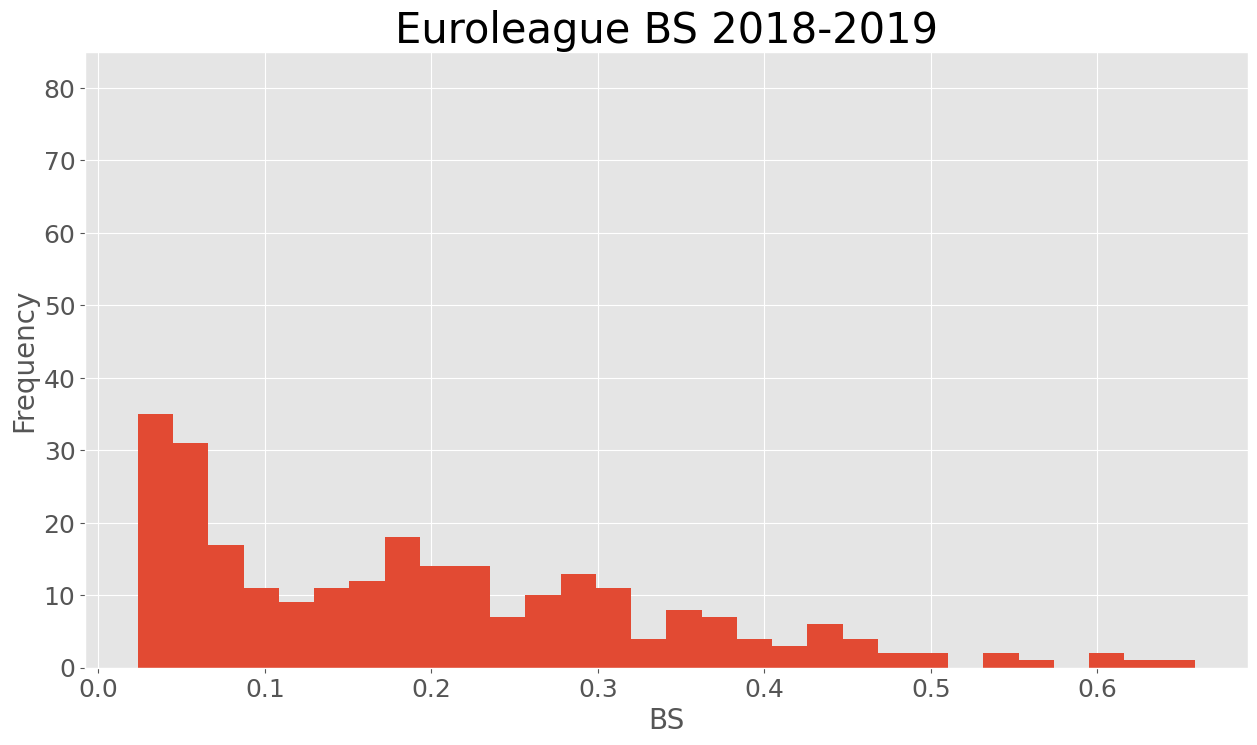

In [ ]:
plt.figure(figsize=(15,8))

plt.hist(see_final_el["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Euroleague BS 2018-2019',fontsize=30)
plt.ylim(0,85)
plt.show()

In [ ]:
see_final_g=x1_el[["Home Team","Away Team","Team Result","Match Date"]][x1_el["Match Date"]>"2018-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [ ]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

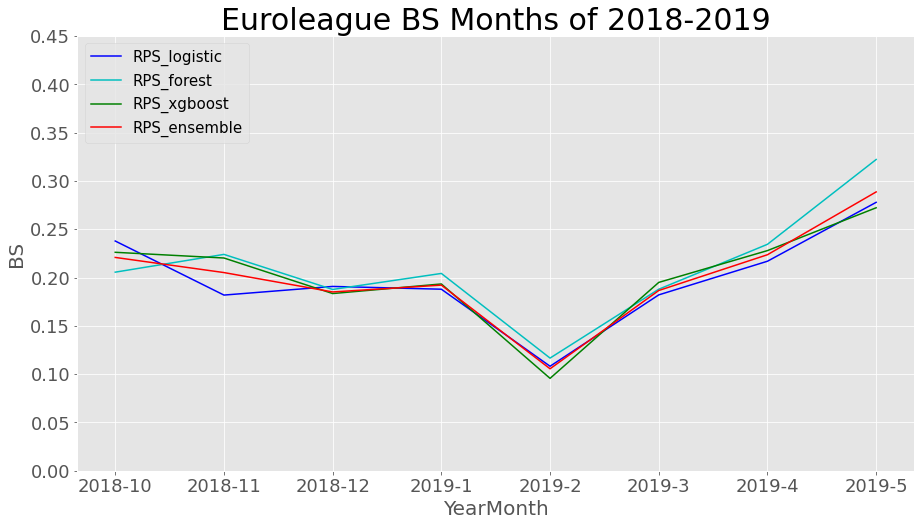

In [ ]:
res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Euroleague BS Months of 2018-2019',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()

# Eurocup

In [303]:
eurocup_features = pd.read_csv('Features_Per_Tournament/eurocup_features.csv',sep = ',')

x_ec = eurocup_features.iloc[:,:-1]
y_ec = eurocup_features.iloc[:,-1]

x1_ec = data[(data['Tournament'] =="Eurocup")&(data['Match Date'] >"2015-8-01")]

In [304]:
x_ec.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Last 32,Quarter-Finals,Regular Season,Semifinals,Top 16
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,-12.204556,-84778.730778,-0.068963,-0.875000,-7.750000,-12.031433,0.000000,-15.231253,-46.735417,-93.225000,-52.829167,-82.748809,-95.822290,-44.933163,-81.766667,-45.792852,-51.417946,-14.092594,-19.440187,-14.535802,-11.518226,-10.814450,-6.246255,-10.008990,-5.298085,-7.418151,-27.475000,-58.600000,-35.679167,-39.525197,-74.016667,-40.882390,-46.374785,-13.239145,-17.673638,-13.273851,-6.045248,-7.451631,-5.194044,-6.408320,0.000000,0.000000,0.000000,-0.8,-1.4,-12.534235,0.000000,-15.477060,-41.5625,-84.8,-47.51,-89.491081,-94.105363,-42.664928,-78.0,-43.369988,-47.418733,-14.253387,-15.856390,-13.740697,-8.635730,-10.379517,-7.175533,-9.162990,-6.330837,-8.524397,-33.6750,-68.1,-42.06,-42.053929,-76.6,-43.174974,-48.002890,-12.249256,-12.397846,-11.423284,-5.517351,-7.601393,-4.536903,-6.314649,2.797386,13.131492,2.974624,16.534765,6.093137,10.029412,5.888562,-2.974624,0.949752,0.597564,0.333961,0.985668,1.540137,1.094944,-0.521717,0.409131,0.733025,0.187497,0.257893,0.598039,0,0,1,0,0
1,-1.0,-1.0,-2.0,-33.0,-9.933820,-51.215100,-1.0,-2.0,-9.933820,-1.219377,-192575.811200,-0.018749,-0.062500,-7.912500,-3.475914,-8.826563,-2.039553,-6.034375,-6.650000,-9.030000,0.961973,-7.864590,-4.032841,-5.812500,-1.319172,-3.133374,-0.461413,-1.925592,-0.815561,-4.787256,-1.323187,-0.554788,-0.473220,-1.201433,-1.283288,3.131250,4.262500,2.925000,-1.305496,2.100000,-0.987234,-2.671026,-7.407501,-10.343074,-9.800946,-2.981906,-7.653529,-3.518435,-4.481

In [305]:
corr_df =eurocup_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
114,Team Result,1.000000
13,history_pointsdiff,0.318954
15,history_Ediff,0.311300
53,Current_form_pointsdiff,0.305181
55,Current_form_EDiff,0.290270
9,pi_ratings,0.271886
52,Current_form_winner,0.264498
10,elo,0.261306
12,history_winner,0.245544
17,history_FIC,0.199579


## Classifiers

In [306]:
x_ec_scaled = MinMaxScaler().fit_transform(x_ec)

In [307]:
x_train_ec=x_ec_scaled[:len(x1_ec[x1_ec["Match Date"]<"2018-8-1"])]
y_train_ec=y_ec.iloc[:len(x1_ec[x1_ec["Match Date"]<"2018-8-1"])]
x_test_ec=x_ec_scaled[len(x1_ec[x1_ec["Match Date"]<"2018-8-1"]):]
y_test_ec=y_ec.iloc[len(x1_ec[x1_ec["Match Date"]<"2018-8-1"]):]

## Logistic Regression

In [308]:
lgr = LogisticRegression(solver="liblinear",C=0.11202934112738094, penalty= 'l2').fit(x_train_ec,y_train_ec)
y_pre_proba_lgr=lgr.predict_proba(x_test_ec)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(y_pre_proba_lgr[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_ec),3))

Logistic Regression

Test BS: 0.206

Test Accuracy: 0.683

Test F1-score: 0.767


In [309]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_ec.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef1,'eurocup')
sorted_coef1

,feature_name,value
0,pi_ratings,0.387238
1,history_pointsdiff,0.371165
2,history_Ediff,0.348405
3,elo,0.336082
4,Current_form_pointsdiff,0.288018
5,Current_form_EDiff,0.285549
6,Current_form_winner,0.263171
7,Current_form_FIC_received,-0.257365
8,Current_form_Game_Score_received,-0.252128
9,Current_form_Performance_Index_received,-0.231134


## Random Forest Classifier

In [310]:
rfc = RandomForestClassifier(max_depth= 20, max_features='log2', min_samples_leaf=0.018815423604170822,
                             min_samples_split=0.231123081097249, n_estimators=41,
                             random_state=2).fit(x_train_ec, y_train_ec)

y_pre_proba_rfc=rfc.predict_proba(x_test_ec)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(y_pre_proba_rfc[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_ec),3))

Random Forest Classifier

Test BS: 0.199

Test Accuracy: 0.704

Test F1-score: 0.784


In [311]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_ec.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef2,'eurocup')
sorted_coef2

,feature_name,value
0,history_pointsdiff,0.125575
1,pi_ratings,0.059252
2,Current_form_Performance_Index_received,0.044723
3,Current_form_FIC_received,0.039002
4,history_Play_received,0.031293
5,Current_form_Drtg_sd,0.030289
6,Current_form_pointsdiff,0.030135
7,history_Ediff,0.029765
8,history_winner,0.029462
9,history_Drtg,0.028160


## xgboost

In [312]:
alg = XGBClassifier(colsample_bytree=0.18034283170379617,gamma = 2.688094427224775,learning_rate= 0.08143707355158153, 
                    max_depth=1,n_estimators=46,reg_lambda= 0.9440898051715958,subsample=0.46431618708247235,
                    objective='binary:logistic').fit(x_train_ec, y_train_ec)

y_pre_proba_alg=alg.predict_proba(x_test_ec)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(y_pre_proba_alg[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_ec),3))


xgboost

Test BS: 0.198

Test Accuracy: 0.694

Test F1-score: 0.767


In [313]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_ec.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef3,'eurocup')
sorted_coef3

,feature_name,value
0,history_Points_received,0.065808
1,Current_form_pointsdiff,0.061525
2,history_pointsdiff,0.053500
3,pagerank,0.049823
4,pi_ratings,0.040202
5,history_Game_Score_received,0.038796
6,history_Points_received_sd,0.038026
7,Current_form_Performance_Index_sd,0.037495
8,Current_form_EDiff,0.037296
9,Current_form_pi_ratings,0.035625


# Ensemble

In [314]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,ens_proba),3))
print()
ens_pred=np.where(ens_proba > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(ens_pred ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(ens_pred,y_test_ec),3))

------Ensemble 3 classifier-------

Test BS: 0.2

Test Accuracy: 0.688

Test F1-score: 0.768


In [315]:
gp_model(x_train_ec, y_train_ec, x_test_ec, y_test_ec, lgr, rfc, alg, ens_proba)

Best parameters: {'kernel__k1__constant_value': 0.1, 'kernel__k2__length_scale': 1.0}
Test BS: 0.2

Test Accuracy: 0.688

Test F1-score: 0.768
Stacking BS: 0.199

Stacking Accuracy: 0.704

Stacking F1-score: 0.784


In [259]:
see_final_ec=x1_ec[["Home Team","Away Team","Team Result"]][x1_ec["Match Date"]>"2018-8-1"]
see_final_ec["prediction probability"]=y_pre_proba_alg[:,1]
see_final_ec["RPS"]=(see_final_ec["Team Result"]-see_final_ec["prediction probability"])**2
see_final_ec[see_final_ec["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4158,BC RYTAS,SKYLINERS FRANKFURT,0,0.777675,0.604778
4162,AQUILA BASKET TRENTO,BC ZENIT SAINT PETERSBURG,0,0.716510,0.513386
4228,PBC LOKOMOTIV KUBAN,ALBA BERLIN,0,0.764107,0.583860
4260,AS MONACO BASKET,PALLACANESTRO BRESCIA,0,0.720656,0.519345
4298,PALLACANESTRO BRESCIA,BC ANDORRA,0,0.750029,0.562543
4403,ASVEL BASKET,KK PARTIZAN,0,0.801201,0.641923
4439,KK CEDEVITA JUNIOR,TOFAŞ S.K.,0,0.729608,0.532328
4455,PALLACANESTRO BRESCIA,RATIOPHARM ULM,0,0.774028,0.599119
4508,PBC LOKOMOTIV KUBAN,ASVEL BASKET,0,0.716453,0.513306
4610,AS MONACO BASKET,KK PARTIZAN,0,0.740971,0.549038


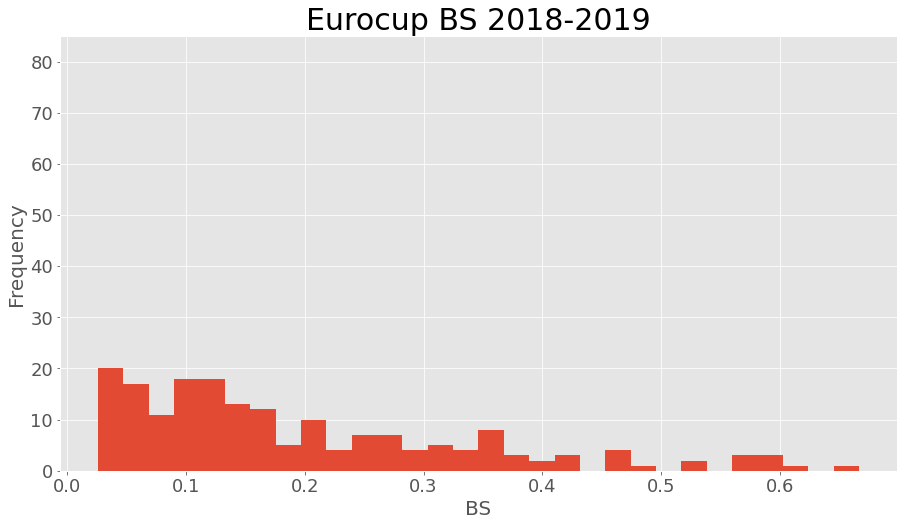

In [71]:
plt.figure(figsize=(15,8))

plt.hist(see_final_ec["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Eurocup BS 2018-2019',fontsize=30)
plt.ylim(0,85)
plt.show()

In [72]:
see_final_g=x1_ec[["Home Team","Away Team","Team Result","Match Date"]][x1_ec["Match Date"]>"2018-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [73]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

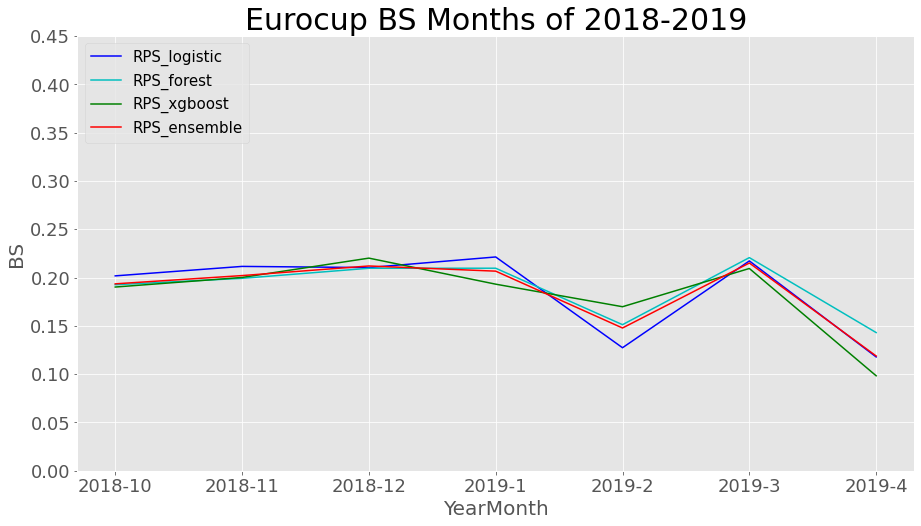

In [74]:

res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Eurocup BS Months of 2018-2019',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()